#### Imports

In [18]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
%matplotlib inline

plt.rcParams['figure.figsize']=(9,8)

#### PCA
* A idéia principal da análise de componentes principais (PCA) é reduzir a dimensionalidade de um conjunto de dados que consiste em muitas variáveis ​​correlacionadas entre si, seja de maneira forte ou leve, mantendo a variação presente no conjunto de dados até a extensão máxima. O mesmo é feito transformando as variáveis ​​em um novo conjunto de variáveis, que são conhecidas como componentes principais (ou simplesmente PCs) e são ortogonais, ordenadas de tal forma que a retenção de variação presente nas variáveis ​​originais diminui à medida que nos movemos. na ordem. Assim, o primeiro componente principal mantém a variação máxima que estava presente nos componentes originais. Os componentes principais são os autovetores de uma matriz de covariância e, portanto, são ortogonais.

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df_iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x_iris = df_iris.loc[:, features].values

y_iris = df_iris.loc[:,['target']].values
# cada característica deve ser centralizada (média zero) e com variação de unidade
x_iris = StandardScaler().fit_transform(x_iris)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_iris)
principalDf_iris = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf_iris = pd.concat([principalDf_iris, df_iris[['target']]], axis = 1)
finalDf_iris.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


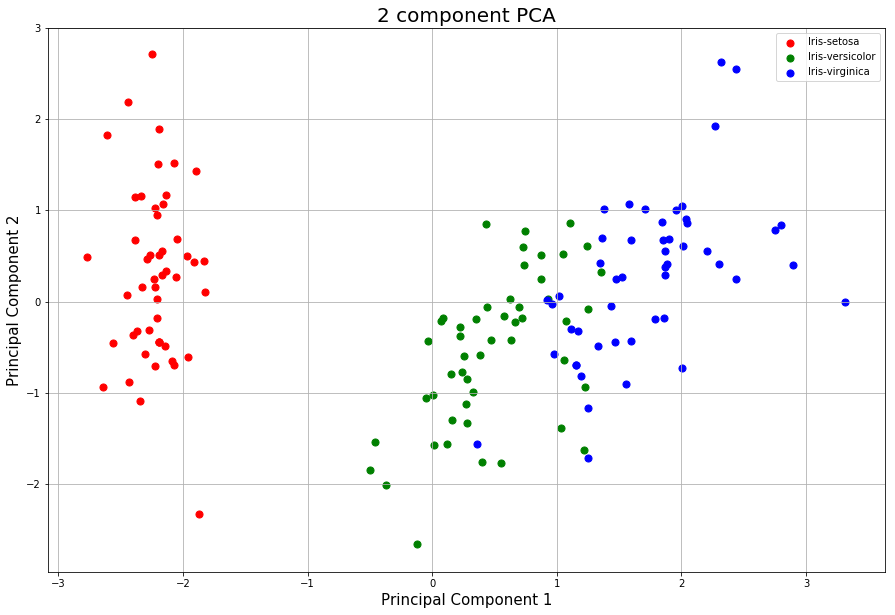

In [23]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_iris['target'] == target
    ax.scatter(finalDf_iris.loc[indicesToKeep, 'principal component 1']
               , finalDf_iris.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Plotting the magnitude of each feature

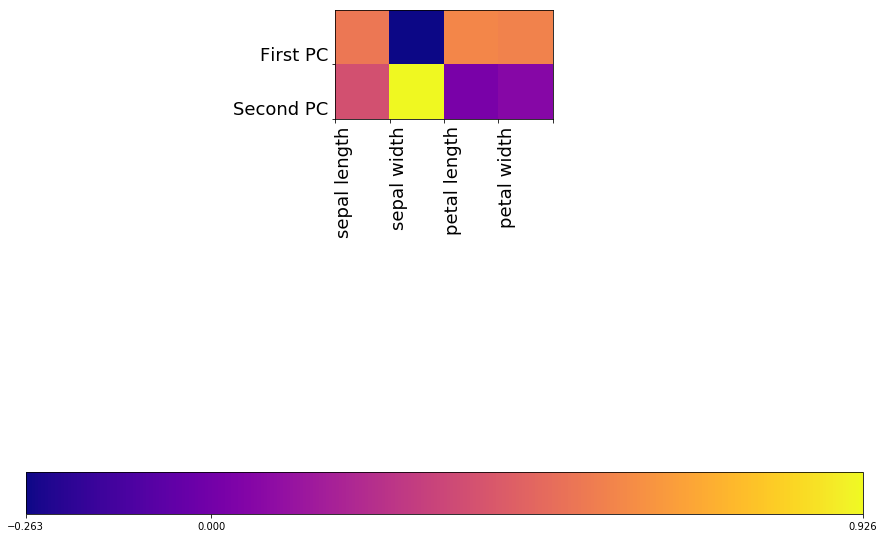

In [24]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(features)

plt.gca().set_xticks(np.arange(-.5, len(features)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(features, rotation=90, ha='left', fontsize=18);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=18);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

In [25]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [26]:
finalDf_iris.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [27]:
principalDf_iris = principalDf_iris.values

#### K-means

In [29]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(principalDf_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [30]:
kmeans.cluster_centers_

array([[ 0.56713803, -0.8076751 ],
       [-2.20485567,  0.96383837],
       [ 1.72236912,  0.59990509],
       [-2.23819831, -0.49619109]])

In [31]:
print(kmeans.cluster_centers_[:, 0:1])
print("\n",kmeans.cluster_centers_[:, 1:2])

[[ 0.56713803]
 [-2.20485567]
 [ 1.72236912]
 [-2.23819831]]

 [[-0.8076751 ]
 [ 0.96383837]
 [ 0.59990509]
 [-0.49619109]]


In [32]:
kmeans.cluster_centers_[:, 0]

array([ 0.56713803, -2.20485567,  1.72236912, -2.23819831])

In [33]:
kmeans.cluster_centers_[:, 1]

array([-0.8076751 ,  0.96383837,  0.59990509, -0.49619109])

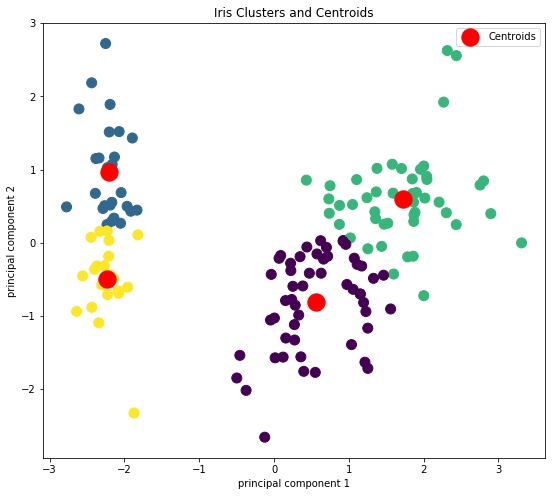

In [34]:
plt.scatter(principalDf_iris[:,0], principalDf_iris[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()

plt.show()

#### Elbow Method

1 574.8058521688922
2 198.7068359263738
3 116.24247259315806
4 89.73403024908127
5 66.30466061696256
6 58.39845693529877
7 48.30250267358139
8 40.04524152357712
9 35.35481058195974
10 29.203330176938543


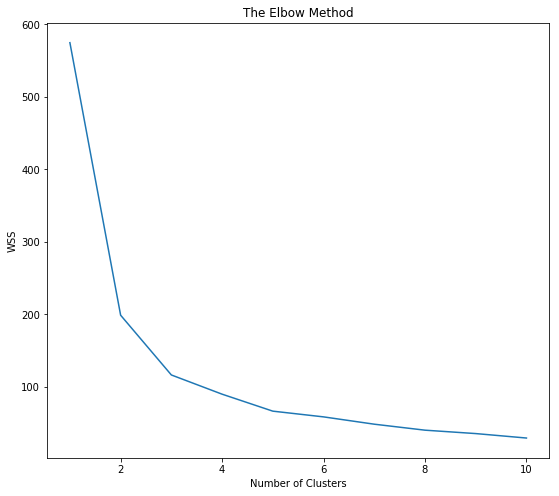

In [35]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(principalDf_iris)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

#### Métodos de aprendizado múltiplos (MDS)
* é um método de aprendizado do distribuidor de preservação de distância. Todos os algoritmos de aprendizado múltiplos assumem   que o conjunto de dados se encontra em uma variedade suave e não linear de baixa dimensão.
* Escalonamento multidimensional (MDS) no conjunto de dados de Iris

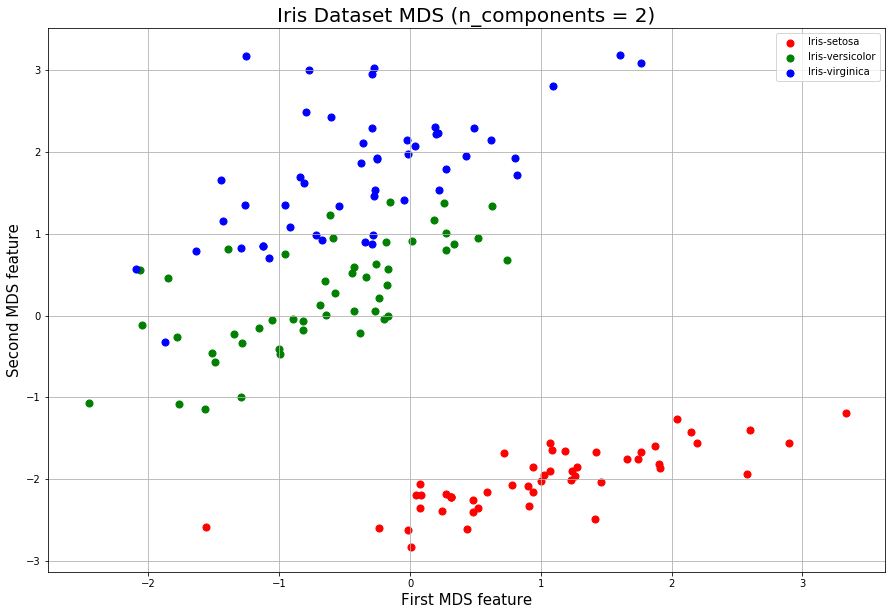

In [36]:
mds = MDS(n_components = 2)

X_iris_mds = mds.fit_transform(x_iris)

principalDf_iris_mds = pd.DataFrame(data = X_iris_mds
             , columns = ['First MDS feature', 'Second MDS feature'])
finalDf_iris_mds = pd.concat([principalDf_iris_mds, df_iris[['target']]], axis = 1)
finalDf_iris_mds.head()

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First MDS feature', fontsize = 15)
ax.set_ylabel('Second MDS feature', fontsize = 15)
ax.set_title('Iris Dataset MDS (n_components = 2)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_iris_mds['target'] == target
    ax.scatter(finalDf_iris_mds.loc[indicesToKeep, 'First MDS feature']
               , finalDf_iris_mds.loc[indicesToKeep, 'Second MDS feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Breast Cancer Dataset

In [37]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

df_cancer = pd.DataFrame(data = y_cancer
             , columns = ['target'])
df_cancer['target'] = df_cancer['target'].map({0: 'malignant', 1: 'benign'})

x_cancer = StandardScaler().fit_transform(X_cancer)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_cancer)
principalDf_cancer = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf_cancer = pd.concat([principalDf_cancer, df_cancer[['target']]], axis = 1)
finalDf_cancer.head()

,principal component 1,principal component 2,target
0,9.192837,1.948583,malignant
1,2.387802,-3.768172,malignant
2,5.733896,-1.075174,malignant
3,7.122953,10.275589,malignant
4,3.935302,-1.948072,malignant


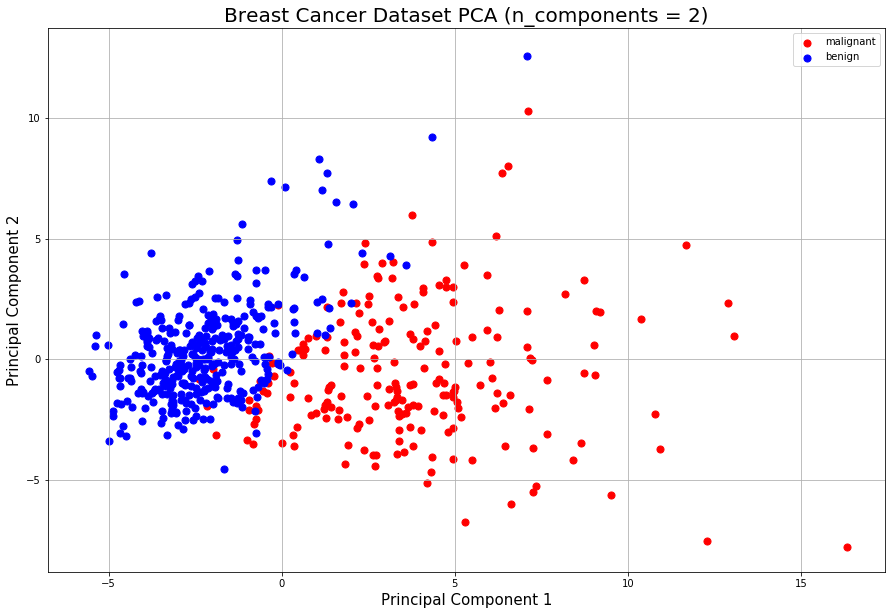

In [38]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Breast Cancer Dataset PCA (n_components = 2)', fontsize = 20)
targets = ['malignant', 'benign']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_cancer['target'] == target
    ax.scatter(finalDf_cancer.loc[indicesToKeep, 'principal component 1']
               , finalDf_cancer.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [39]:
principalDf_cancer = principalDf_cancer.values

#### Plotting the PCA-transformed version of the breast cancer dataset

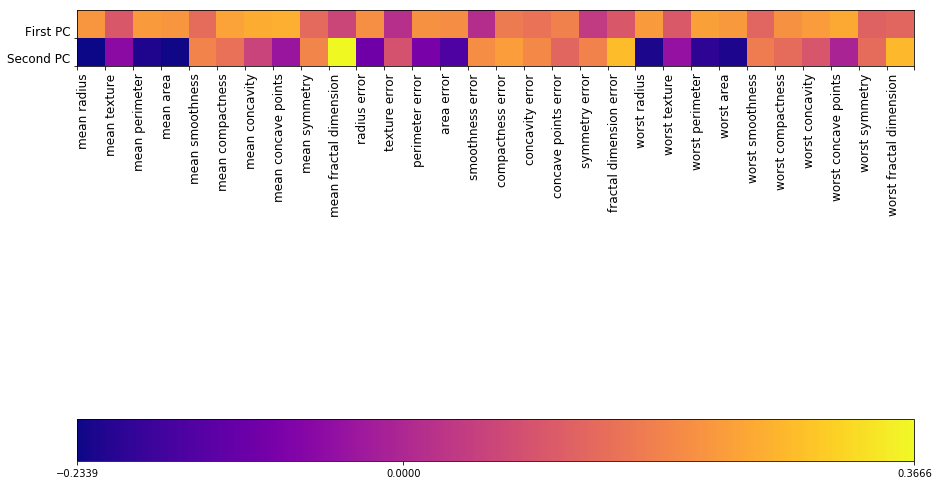

In [40]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

#### K-means

In [41]:
kmeans = KMeans(n_clusters = 6, random_state = 0)
kmeans.fit(principalDf_cancer)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [42]:
kmeans.cluster_centers_

array([[-1.75755432,  1.21165013],
       [ 3.51008647,  7.61714952],
       [ 3.18216498, -2.25165731],
       [-2.86454853, -1.22420533],
       [ 8.60785363, -1.20937002],
       [ 2.8829055 ,  2.1090608 ]])

In [43]:
print(kmeans.cluster_centers_[:, 0:1])
print("\n",kmeans.cluster_centers_[:, 1:2])

[[-1.75755432]
 [ 3.51008647]
 [ 3.18216498]
 [-2.86454853]
 [ 8.60785363]
 [ 2.8829055 ]]

 [[ 1.21165013]
 [ 7.61714952]
 [-2.25165731]
 [-1.22420533]
 [-1.20937002]
 [ 2.1090608 ]]


In [44]:
kmeans.cluster_centers_[:, 0]

array([-1.75755432,  3.51008647,  3.18216498, -2.86454853,  8.60785363,
        2.8829055 ])

In [45]:
kmeans.cluster_centers_[:, 1]

array([ 1.21165013,  7.61714952, -2.25165731, -1.22420533, -1.20937002,
        2.1090608 ])

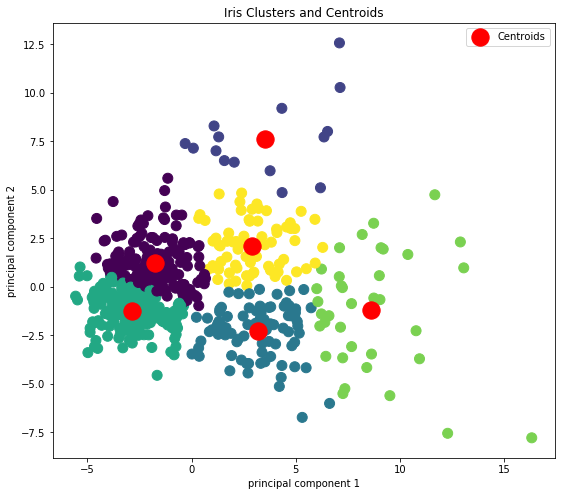

In [46]:
plt.scatter(principalDf_cancer[:,0], principalDf_cancer[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()

plt.show()

#### Method Elbow

1 10795.615546121178
2 5332.555574203117
3 3864.545284004931
4 3133.617860690501
5 2518.7656810222356
6 2194.905512639214
7 1874.425457643595
8 1628.6292965500234
9 1586.6455841416173
10 1348.3837348997185
11 1252.4766195890265
12 1148.4272825797839
13 1030.2475838173505
14 1003.0558230584265
15 946.0212511460309
16 898.9883030251777
17 813.6464223909188
18 771.2785946329966
19 719.5795079783147


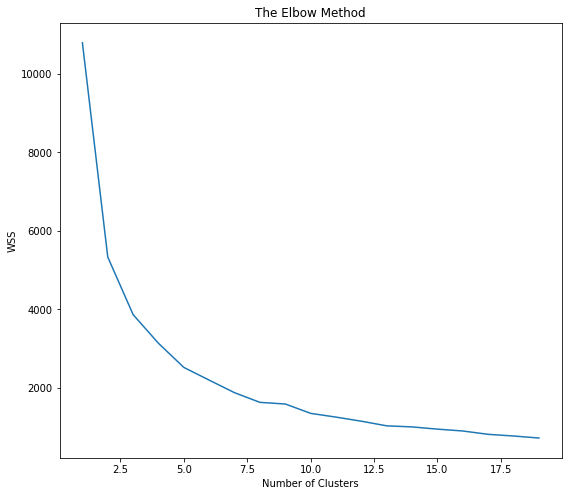

In [47]:
wcss = []
 
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(principalDf_cancer)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

#### Manifold learning methods
* Escalonamento multidimensional (MDS) no banco de dados do câncer de mama

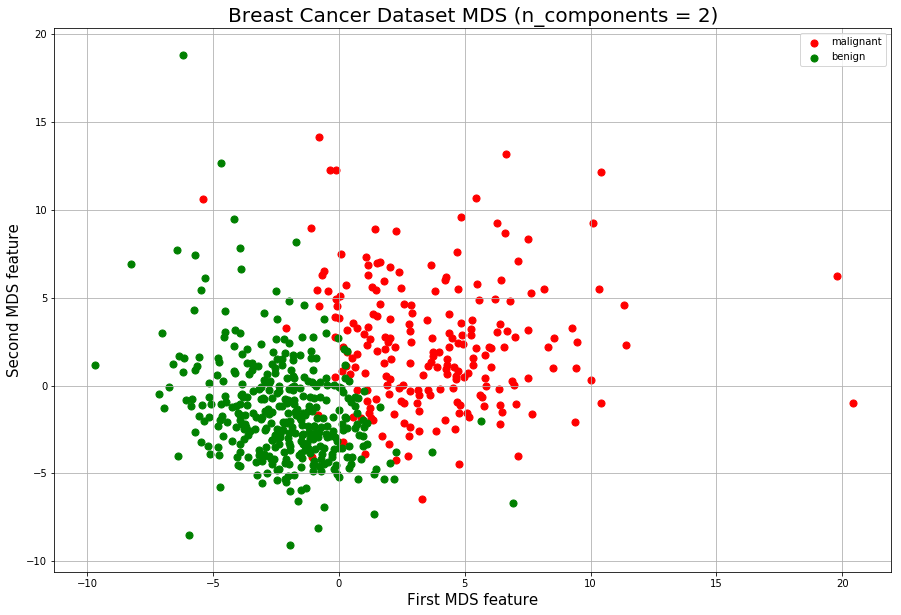

In [48]:
mds = MDS(n_components = 2)

X_cancer_mds = mds.fit_transform(x_cancer)

principalDf_cancer_mds = pd.DataFrame(data = X_cancer_mds
             , columns = ['First MDS feature', 'Second MDS feature'])
finalDf_cancer_mds = pd.concat([principalDf_cancer_mds, df_cancer[['target']]], axis = 1)
finalDf_cancer_mds.head()

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First MDS feature', fontsize = 15)
ax.set_ylabel('Second MDS feature', fontsize = 15)
ax.set_title('Breast Cancer Dataset MDS (n_components = 2)', fontsize = 20)
targets = ['malignant', 'benign']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_cancer_mds['target'] == target
    ax.scatter(finalDf_cancer_mds.loc[indicesToKeep, 'First MDS feature']
               , finalDf_cancer_mds.loc[indicesToKeep, 'Second MDS feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### fruit_data_with_color

In [49]:
fruits = pd.read_table('../data/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].values
y_fruits = (fruits[['fruit_label']] - 1).values


df_fruits = pd.DataFrame(data = y_fruits
             , columns = ['target'])
df_fruits['target'] = df_fruits['target'].map({0: 'apple', 1: 'mandarin',2: 'orange', 3: 'lemon'})

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
x_fruits = StandardScaler().fit_transform(X_fruits)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_fruits)
principalDf_fruits = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf_fruits = pd.concat([principalDf_fruits, df_fruits[['target']]], axis = 1)
finalDf_fruits.head()

,principal component 1,principal component 2,target
0,1.572169,-1.980044,apple
1,0.878417,-1.579373,apple
2,0.529773,-1.732891,apple
3,-2.712610,0.414674,mandarin
4,-2.893412,0.242003,mandarin


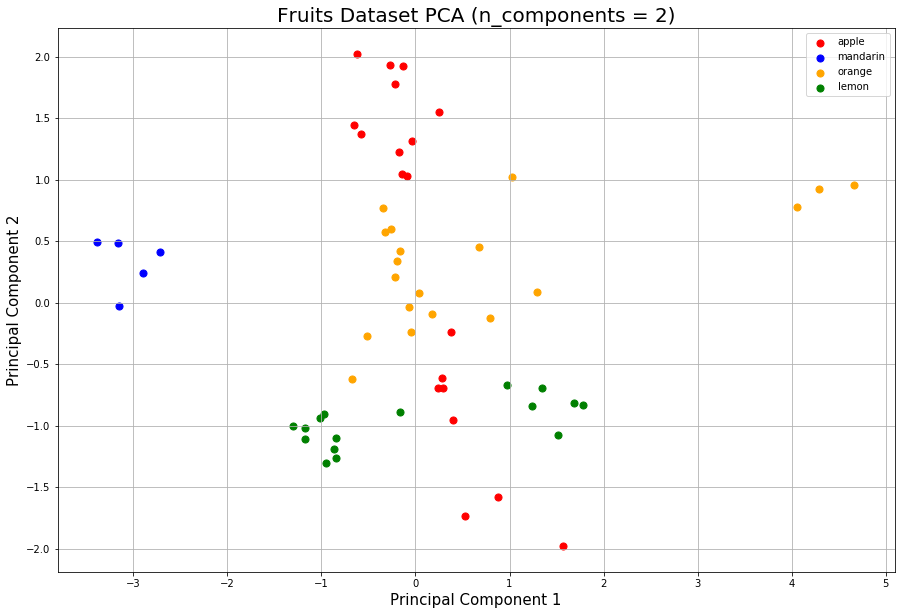

In [50]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Fruits Dataset PCA (n_components = 2)', fontsize = 20)
targets = ['apple','mandarin','orange','lemon']
colors = ['r', 'b','orange','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_fruits['target'] == target
    ax.scatter(finalDf_fruits.loc[indicesToKeep, 'principal component 1']
               , finalDf_fruits.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [51]:
principalDf_fruits = principalDf_fruits.values

In [52]:
kmeans = KMeans(n_clusters = 7, random_state = 0)
kmeans.fit(principalDf_fruits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [53]:
kmeans.cluster_centers_

array([[-9.84635614e-01, -1.04430313e+00],
       [-2.69902230e-01,  1.61900858e+00],
       [ 1.28251047e+00, -1.01287968e+00],
       [ 4.34052503e+00,  8.88078228e-01],
       [-3.06228277e+00,  3.24156474e-01],
       [ 1.48405080e-01, -3.96117345e-01],
       [-4.06506943e-03,  6.46914201e-01]])

In [54]:
print(kmeans.cluster_centers_[:, 0:1])
print("\n",kmeans.cluster_centers_[:, 1:2])

[[-9.84635614e-01]
 [-2.69902230e-01]
 [ 1.28251047e+00]
 [ 4.34052503e+00]
 [-3.06228277e+00]
 [ 1.48405080e-01]
 [-4.06506943e-03]]

 [[-1.04430313]
 [ 1.61900858]
 [-1.01287968]
 [ 0.88807823]
 [ 0.32415647]
 [-0.39611735]
 [ 0.6469142 ]]


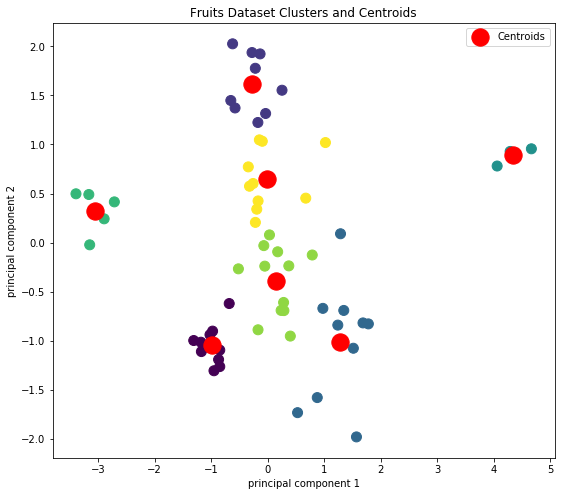

In [55]:
plt.scatter(principalDf_fruits[:,0], principalDf_fruits[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'red',label = 'Centroids')
plt.title('Fruits Dataset Clusters and Centroids')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()

plt.show()

#### Method Elbow

1 197.04873009832056
2 124.46345826116705
3 84.89746448039972
4 47.02149795771841
5 25.300248058731103
6 16.347697123889315
7 12.93161162001782
8 10.269309407015085
9 8.915629692408123
10 7.157617322693159
11 6.193543700369156
12 5.685760952033664
13 4.616974804491727
14 4.431255608309322
15 3.7410241061271834
16 3.8150035260129895
17 3.459445462254796
18 3.121923633657421
19 2.9294094669647133


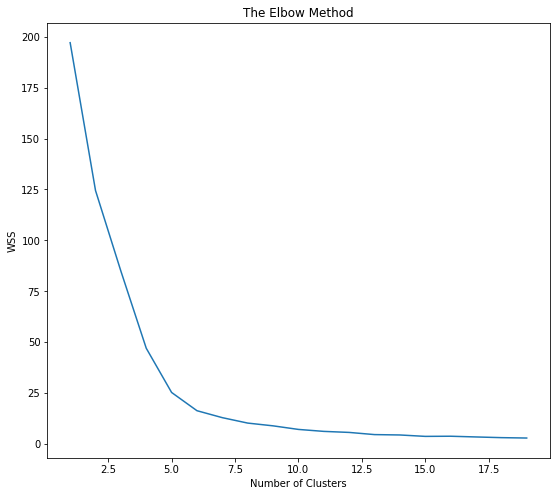

In [56]:
wcss = []
 
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(principalDf_fruits)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

#### Manifold learning methods
* Escalonamento multidimensional (MDS) em uma amostra de dados de frutas

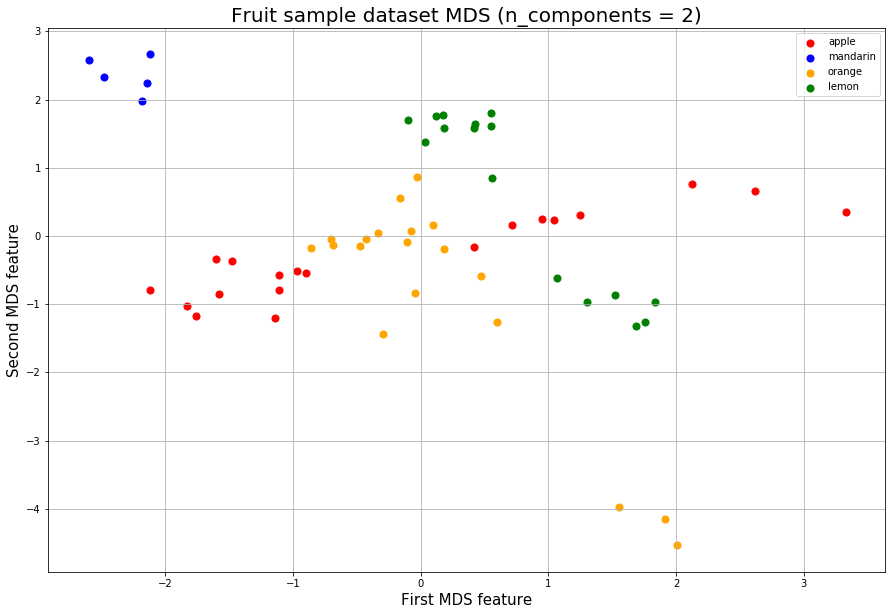

In [57]:
mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(x_fruits)

principalDf_fruits_mds = pd.DataFrame(data = X_fruits_mds
             , columns = ['First MDS feature', 'Second MDS feature'])
finalDf_fruits_mds = pd.concat([principalDf_fruits_mds, df_fruits[['target']]], axis = 1)
finalDf_fruits_mds.head()

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First MDS feature', fontsize = 15)
ax.set_ylabel('Second MDS feature', fontsize = 15)
ax.set_title('Fruit sample dataset MDS (n_components = 2)', fontsize = 20)
targets = ['apple', 'mandarin', 'orange', 'lemon']
colors = ['r', 'b','orange','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_fruits_mds['target'] == target
    ax.scatter(finalDf_fruits_mds.loc[indicesToKeep, 'First MDS feature']
               , finalDf_fruits_mds.loc[indicesToKeep, 'Second MDS feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

##### t-SNE
* A Incorporação de Vizinhos Estocásticos Distribuídos em T (t-SNE) é uma técnica ( ganhadora de prêmios ) para redução de dimensionalidade que é particularmente adequada para a visualização de conjuntos de dados de alta dimensão. A técnica pode ser implementada via aproximações Barnes-Hut, permitindo que ela seja aplicada em grandes conjuntos de dados do mundo real. Nós aplicamos em conjuntos de dados com até 30 milhões de exemplos.
* t-SNE para a amostra dos dados de frutas
* Aqui, ele não vai funcionar tão bem em encontrar estrutura no conjunto de dados de pequenas frutas, comparado a outros         métodos como MDS e PCA.)

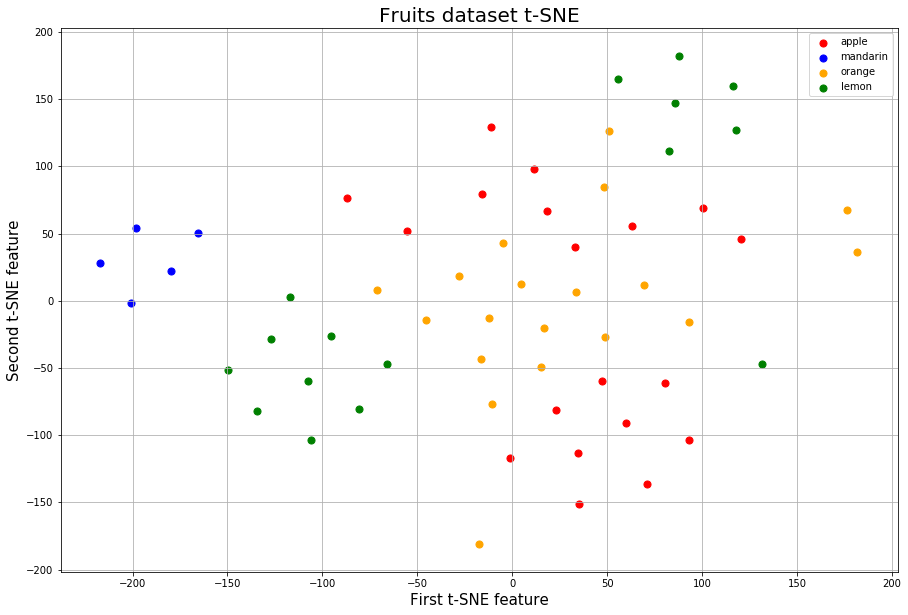

In [58]:
tsne = TSNE(random_state = 0)

X_fruits_tsne = tsne.fit_transform(x_fruits)

principalDf_fruits_tsne = pd.DataFrame(data = X_fruits_tsne
             , columns = ['First t-SNE feature', 'Second t-SNE feature'])
finalDf_fruits_tsne = pd.concat([principalDf_fruits_tsne, df_fruits[['target']]], axis = 1)
finalDf_fruits_tsne.head()

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First t-SNE feature', fontsize = 15)
ax.set_ylabel('Second t-SNE feature', fontsize = 15)
ax.set_title('Fruits dataset t-SNE', fontsize = 20)
targets = ['apple', 'mandarin', 'orange', 'lemon']
colors = ['r', 'b','orange','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_fruits_tsne['target'] == target
    ax.scatter(finalDf_fruits_tsne.loc[indicesToKeep, 'First t-SNE feature']
               , finalDf_fruits_tsne.loc[indicesToKeep, 'Second t-SNE feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### t-SNE no conjunto de dados do câncer de mama

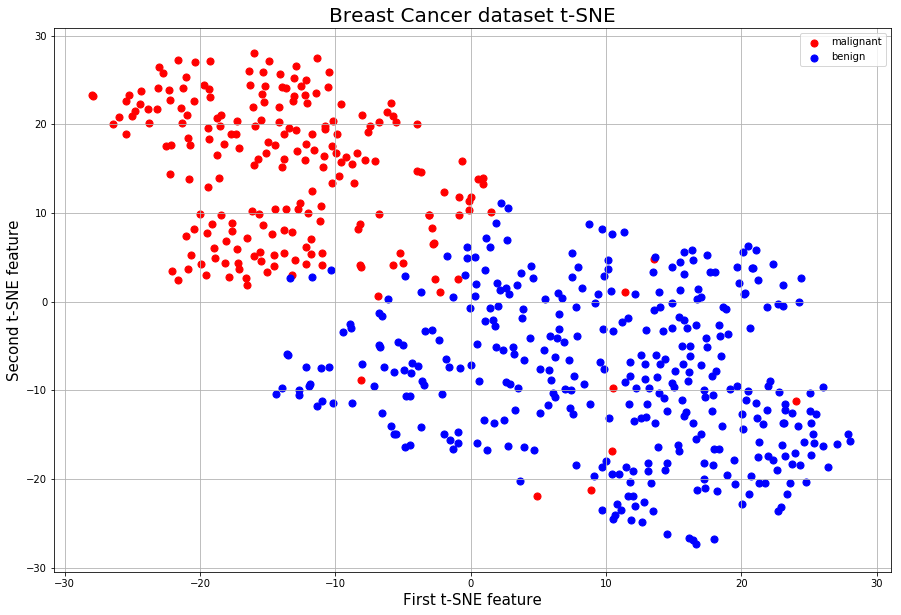

In [59]:
tsne = TSNE(random_state = 0)

X_cancer_tsne = tsne.fit_transform(x_cancer)

principalDf_cancer_tsne = pd.DataFrame(data = X_cancer_tsne
             , columns = ['First t-SNE feature', 'Second t-SNE feature'])
finalDf_cancer_tsne = pd.concat([principalDf_cancer_tsne, df_cancer[['target']]], axis = 1)
finalDf_cancer_tsne.head()

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First t-SNE feature', fontsize = 15)
ax.set_ylabel('Second t-SNE feature', fontsize = 15)
ax.set_title('Breast Cancer dataset t-SNE', fontsize = 20)
targets = ['malignant', 'benign']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_cancer_tsne['target'] == target
    ax.scatter(finalDf_cancer_tsne.loc[indicesToKeep, 'First t-SNE feature']
               , finalDf_cancer_tsne.loc[indicesToKeep, 'Second t-SNE feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Aglomerado de clustering

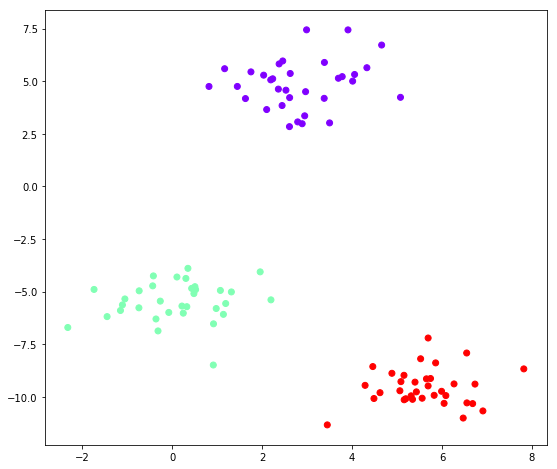

In [60]:
X, y = make_blobs(random_state = 10)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow', )  

#### Criando um dendrograma (usando scipy)

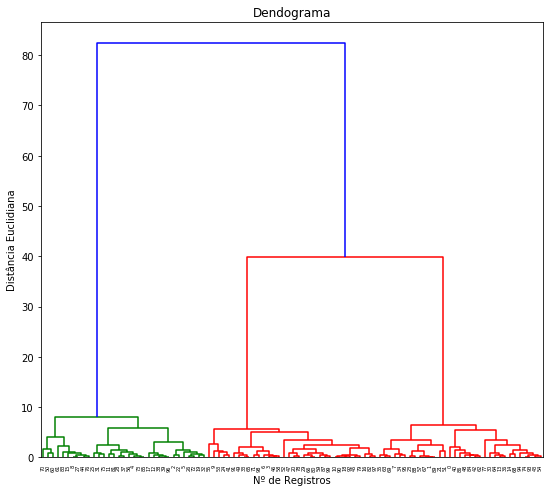

In [64]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
plt.title('Dendograma')
plt.xlabel('Nº de Registros')
plt.ylabel('Distância Euclidiana')
dendrogram(ward(X))
plt.show()

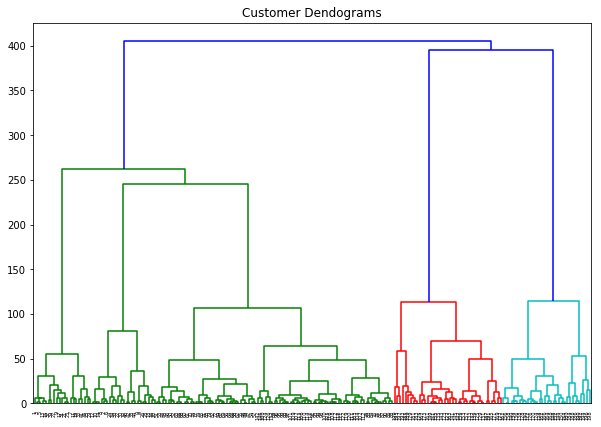

In [65]:
import scipy.cluster.hierarchy as shc

customer_data = pd.read_csv('../data/shopping_data.csv')  
data = customer_data.iloc[:, 3:5].values  

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

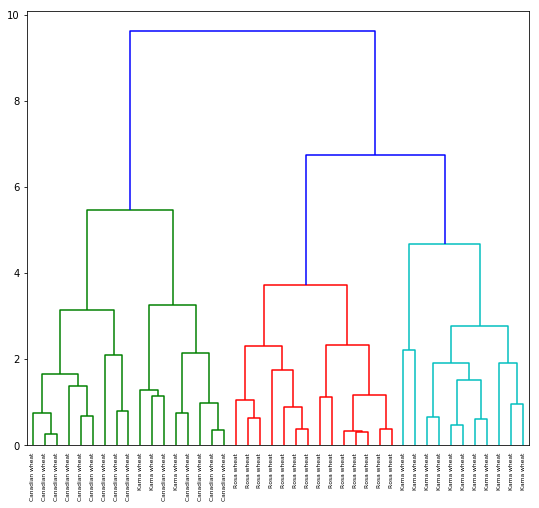

In [16]:
# Reading the DataFrame
seeds_df = pd.read_csv(
    "https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

#### DBSCAN clustering

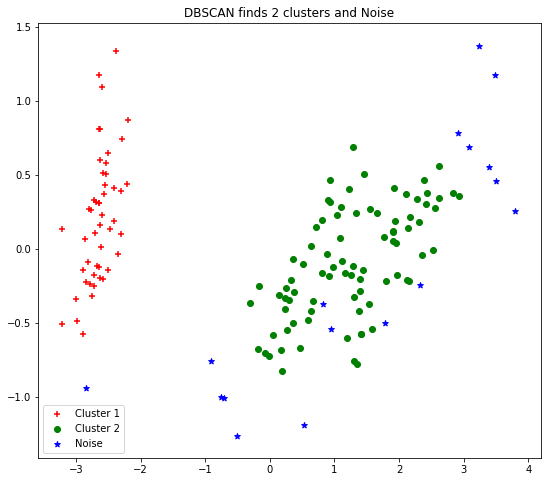

In [19]:
# Load Dataset
iris = load_iris()

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

#### k-means x hierárquico x DBSCAN

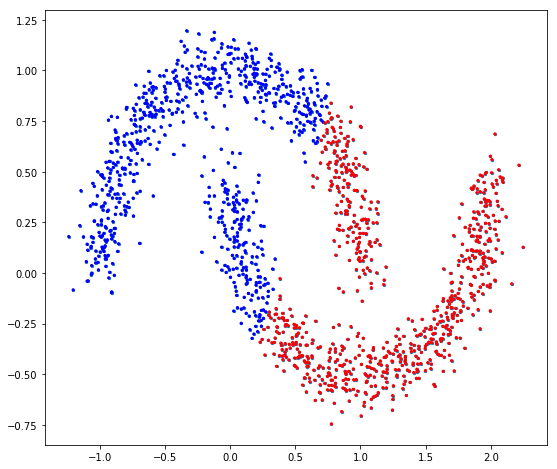

In [11]:
x, y = datasets.make_moons(n_samples = 1500, noise = 0.09)
plt.scatter(x[:, 0], x[:, 1], s = 5)

cores = np.array(['red', 'blue'])

kmeans = KMeans(n_clusters = 2)
previsoes = kmeans.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])

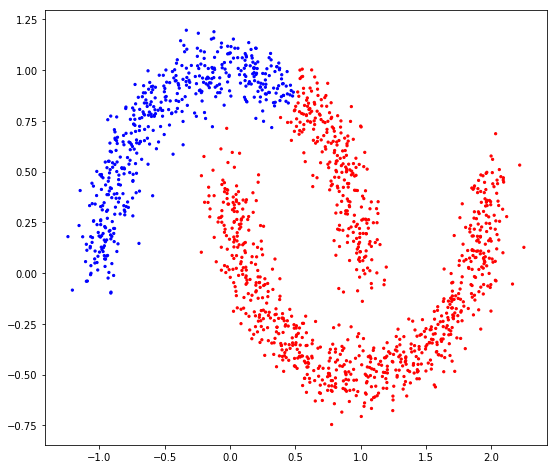

In [12]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])

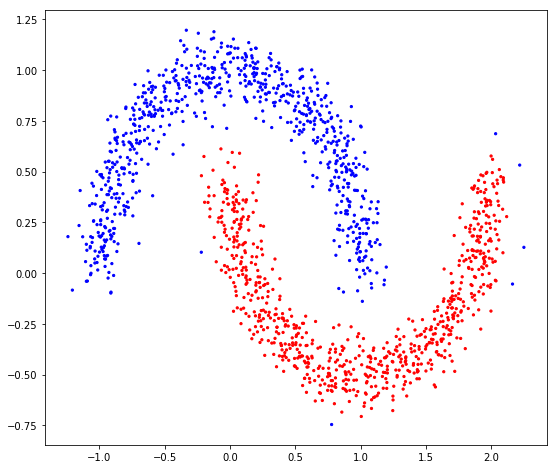

In [13]:
dbscan = DBSCAN(eps = 0.1)
previsoes = dbscan.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])